# Lecture 20 - Plots
### Viz Types, How to Make Them, and When to Use Them

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
# fmri = sns.load_dataset("fmri")
mpg = sns.load_dataset("mpg")

In [26]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

#### Announcements:

#### Goals:

Know how to produce, interpret, and choose when to use several of the most commonly used types of data visualizations:
* Tables
* Dot and line plots
* Box and whisker plots
* Scatter plots
* Bar/column plots and (usually not) pie charts
* Histograms

In [4]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [ ]:
fmri

In [5]:
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

## Matplotlib

Text(0, 0.5, 'Flipper Length (mm)')

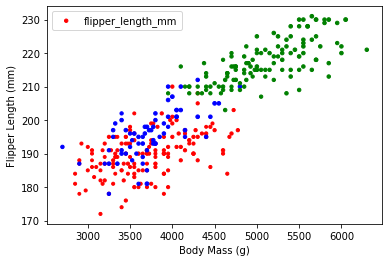

In [8]:
colors = {"Adelie": "red", "Gentoo": "green", "Chinstrap": "blue"}
# size = lambda x: 10 if x > 40 else 1
plt.scatter("body_mass_g", "flipper_length_mm", data=penguins,
            c=penguins["species"].map(colors),
            s=(penguins["bill_length_mm"])/4)
plt.legend()
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")

## Seaborn

Text(33.37652777777779, 0.5, 'Flipper Length (mm)')

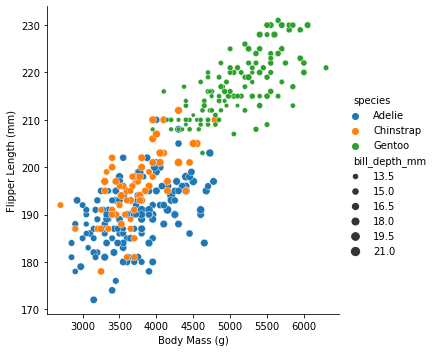

In [12]:
sns.relplot(x="body_mass_g", y="flipper_length_mm",
            hue="species", size="bill_depth_mm", data=penguins)
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")

Key distinction: **figure-level** vs. **axes-level**:
https://seaborn.pydata.org/tutorial/function_overview.html
![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

## Common Data Visualizations

### Tables

Suppose you want to see the 5 biggest penguins.

In [13]:
penguins.sort_values("body_mass_g", ascending=False).iloc[:5,:]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
237  Gentoo  Biscoe            49.2           15.2              221.0   
253  Gentoo  Biscoe            59.6           17.0              230.0   
297  Gentoo  Biscoe            51.1           16.3              220.0   
337  Gentoo  Biscoe            48.8           16.2              222.0   
331  Gentoo  Biscoe            49.8           15.9              229.0   

     body_mass_g   sex  
237       6300.0  Male  
253       6050.0  Male  
297       6000.0  Male  
337       6000.0  Male  
331       5950.0  Male

Discuss: **When should you use this? What are its strengths and weakenesses?**

Table Tips:
* Think about row and column ordering
* Label columns and rows well (clear but concise).
* Uniform precision, right-justified numbers.
* Sometimes: bold or emphasize max or min values in a column

In [14]:
p = penguins.rename(columns={"species": "Species", "island": "Island",
                 "bill_length_mm": "Bill Length (mm)","bill_depth_mm": "Bill Depth (mm)",
                 "flipper_length_mm": "Flipper Length (mm)", "body_mass_g": "Body Mass (g)",
                 "sex": "Sex"})
p = p[["Species", "Island", "Sex", "Body Mass (g)", "Bill Length (mm)", "Bill Depth (mm)", "Flipper Length (mm)"]]
p.sort_values("Body Mass (g)", ascending=False).iloc[:5,:]

Species  Island   Sex  Body Mass (g)  Bill Length (mm)  Bill Depth (mm)  \
237  Gentoo  Biscoe  Male         6300.0              49.2             15.2   
253  Gentoo  Biscoe  Male         6050.0              59.6             17.0   
297  Gentoo  Biscoe  Male         6000.0              51.1             16.3   
337  Gentoo  Biscoe  Male         6000.0              48.8             16.2   
331  Gentoo  Biscoe  Male         5950.0              49.8             15.9   

     Flipper Length (mm)  
237                221.0  
253                230.0  
297                220.0  
337                222.0  
331                229.0

### Dot plots, Line Plots

Conceptually (but not technically) different from a scatter plot, in that $x$ values are assumed to be ordered.

In [15]:
mpg_year = mpg.groupby("model_year").mean()
mpg_year

mpg  cylinders  displacement  horsepower       weight  \
model_year                                                                
70          17.689655   6.758621    281.413793  147.827586  3372.793103   
71          21.250000   5.571429    209.750000  107.037037  2995.428571   
72          18.714286   5.821429    218.375000  120.178571  3237.714286   
73          17.100000   6.375000    256.875000  130.475000  3419.025000   
74          22.703704   5.259259    171.740741   94.230769  2877.925926   
75          20.266667   5.600000    205.533333  101.066667  3176.800000   
76          21.573529   5.647059    197.794118  101.117647  3078.735294   
77          23.375000   5.464286    191.392857  105.071429  2997.357143   
78          24.061111   5.361111    177.805556   99.694444  2861.805556   
79          25.093103   5.827586    206.689655  101.206897  3055.344828   
80          33.696552   4.137931    115.827586   77.481481  2436.655172   
81          30.334483   4.620690    135.310345   81.035714  2522.931034   
82          31.709677   4.193548    128.870968   81.466667  2453.548387   

            acceleration  
model_year                
70             12.948276  
71             15.142857  
72             15.125000  
73             14.312500  
74             16.203704  
75             16.050000  
76             15.941176  
77             15.435714  
78             15.805556  
79             15.813793  
80             16.934483  
81             16.306897  
82             16.638710

No connected dots - technically the same as a scatter plot.

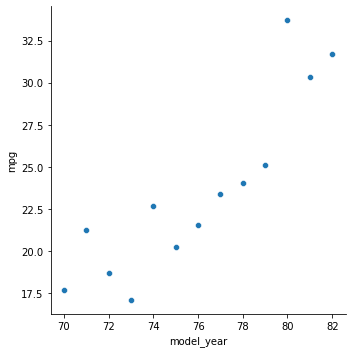

In [16]:
sns.relplot(x="model_year", y="mpg", kind="scatter", data=mpg_year)

Connect the dots: now you have a line plot:

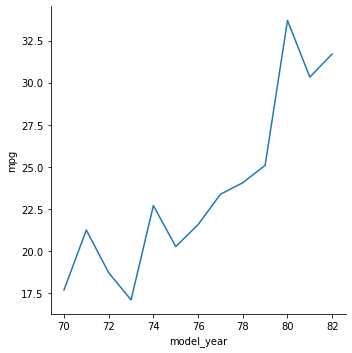

In [17]:
sns.relplot(x="model_year", y="mpg", kind="line", data=mpg_year)

Seaborn does sensible things if you have multiple datapoints per $x$ value:

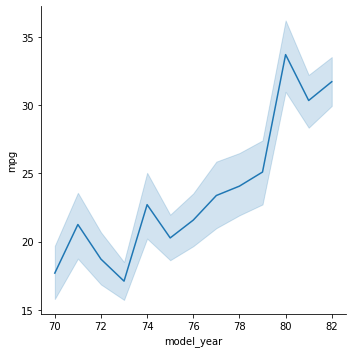

In [18]:
sns.relplot(x="model_year", y="mpg", kind="line", data=mpg)

Discuss: **When should you use this? What are its strengths and weakenesses?**

Also: when should you connect the dots?
* continuous dataset (x axis), e.g., time
* relation between before and after - trends

### Box and whisker plots

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

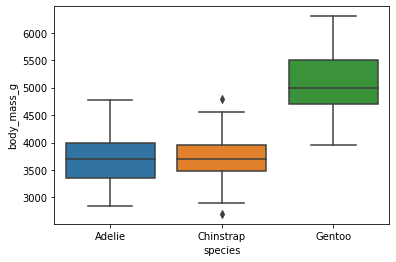

In [19]:
sns.boxplot(x="species", y="body_mass_g", data=penguins)

Discuss: **When should you use this? What are its strengths and weakenesses?**

* grades on canvas
* compare spread of different variables w/o multiple histograms
* kinda like the plotting equivalent of `.describe()`

### Scatter plots

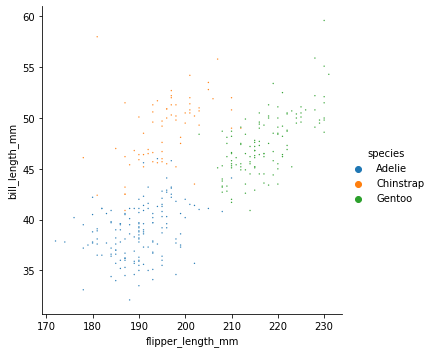

In [22]:
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", s=2)

Discuss: **When should you use this? What are its strengths and weakenesses?**

* show a lot of data
* outliers are obvious but might not skew whole picture
* 4 variables at a time (x, y, color, size)
* too many points overlap

### Bar/column plots and (usually not) pie charts

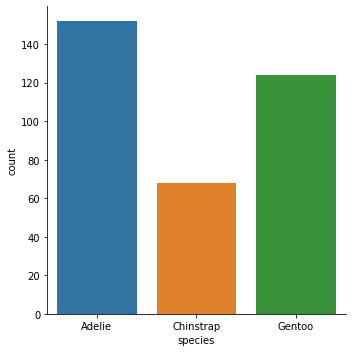

In [23]:
sns.catplot(x="species", data=penguins, kind="count")

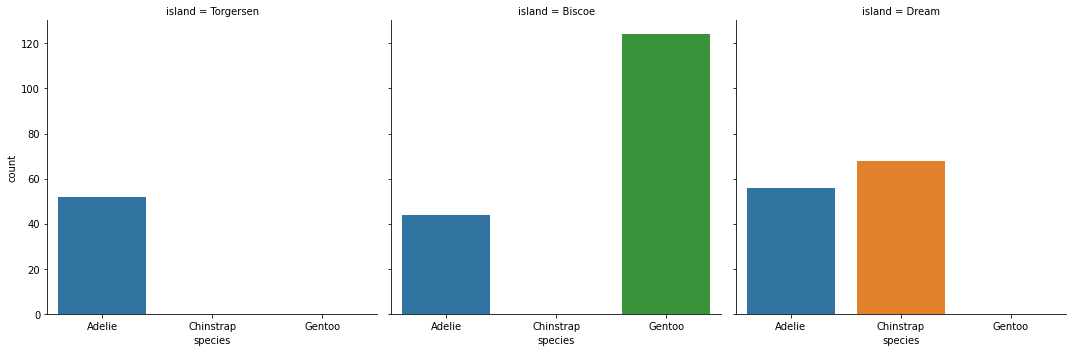

In [24]:
sns.catplot(x="species", data=penguins, kind="count", col="island")

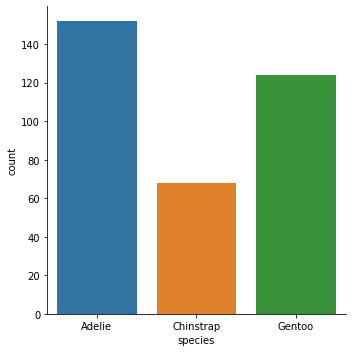

In [25]:
sns.catplot(x="species", data=penguins, kind="count")

Discuss: **When should you use this? What are its strengths and weakenesses?**

* categorical data
* compare distribution of one variable
* low data ink?

### Histograms

In [ ]:
sns.displot(penguins, x="flipper_length_mm")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", stat='density')

In [ ]:
sns.displot(penguins, x="flipper_length_mm", col='species')

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", col="island")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", col="island", kde='True')

In [ ]:
sns.jointplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, kind='hex')

A helpful figure from the book:
![](vis_decisiontree.png)